# Regression & Classificaion의 차이 
- 전체적인 틀은 동일 
- Regression을 사용하는 경우 output activation 이 없고, loss 를 mse로 사용 
- Classification을 하는 경우 output activation을 softmax로, loss를 sparse_categorical_crossentropy 사용 


# 단일 숫자 순차열 데이터 분류 Template


# 실습 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 기반 숫자열 생성

In [2]:
numbers = np.zeros((2000,1))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))

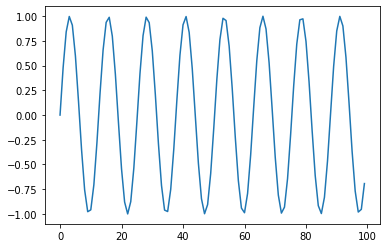

In [6]:
plt.plot(numbers[:100,0])
plt.show()

In [7]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

12345678901234567890의 숫자열로 다음의 입출력 데이터를 생성한다.
```
12345 -> T
23456 -> F
34567 -> T
...
56789 -> F
```

분류 문제 데이터 생성 

In [11]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  next_value = numbers[i+SEQUENCE_LENGTH+OFFSET-1]
  raw_y.append([ int((next_value)>0) ]) #<---- True 와 False의 기준 , 양수와 음수에 따라 0과 1 구분 
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9>0 -> True -> 1

예측 문제 데이터 생성 

In [10]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  next_value = numbers[i+SEQUENCE_LENGTH+OFFSET-1]
  raw_y.append(next_value) #<----- 예측 문제의 경우 실제 값이 들어감 

In [12]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


실제 데이터를 갖고 y값을 만들 땐 일련의 기준을 직접 정한 뒤 코딩을 해주어야 함 

## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [13]:
print(raw_x[0])
print(raw_y[0])

[[0.        ]
 [0.47942554]
 [0.84147098]
 [0.99749499]
 [0.90929743]]
[1]


In [14]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 1)
(1994, 1)
Training Data:
(1794, 5, 1)
(1794, 1)
Test Data:
(200, 5, 1)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[ 0.83665564]
 [ 0.471639  ]
 [-0.00885131]
 [-0.48717451]
 [-0.8462204 ]]

train_y[0]
 [0]


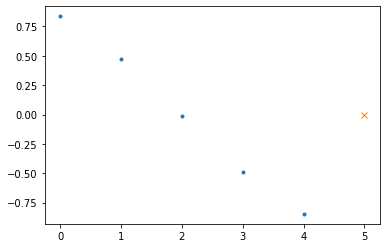

In [15]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')

plt.show()

# DNN 사용

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


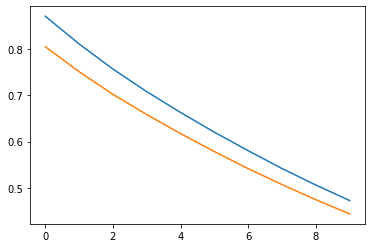

7/7 [==============================] - 0s 3ms/step - loss: 0.4731 - acc: 0.8450
loss= 0.4730685353279114
acc= 0.8450000286102295


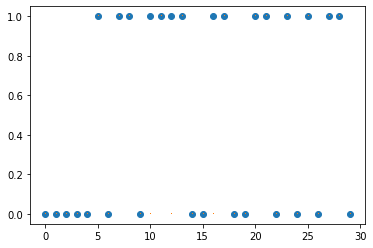

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax")) #<--- 클래스 수 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]) #<---- 예측의 경우 loss = mse, metrics = ['mae']
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()

# Template

## LSTM <--- output, compile을 제외하고 모두 동일 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 67,872
Trainable params: 67,872
Non-trainable params: 0
_________________________________________________________________


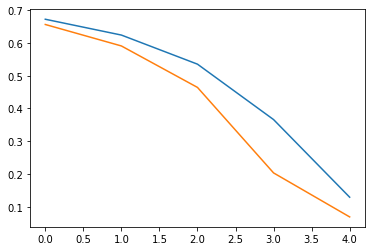

7/7 [==============================] - 0s 3ms/step - loss: 0.0625 - acc: 0.9750
loss= 0.06251552700996399
acc= 0.9750000238418579


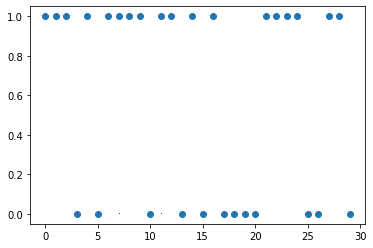

In [19]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128)) #<---- LSTM 레이어 
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=5, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',',color='red')
plt.show()

## GRU

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 51,616
Trainable params: 51,616
Non-trainable params: 0
_________________________________________________________________


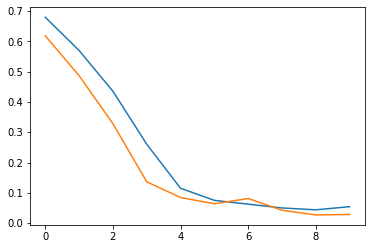

7/7 [==============================] - 0s 4ms/step - loss: 0.0552 - acc: 0.9650
loss= 0.0551675520837307
acc= 0.9649999737739563


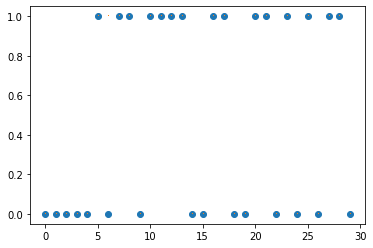

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(GRU(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()

## Bidirectional + LSTM

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              133120    
 l)                                                              
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 135,712
Trainable params: 135,712
Non-trainable params: 0
_________________________________________________________________


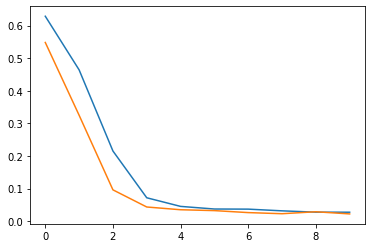

7/7 [==============================] - 0s 4ms/step - loss: 0.0527 - acc: 0.9800
loss= 0.052710674703121185
acc= 0.9800000190734863


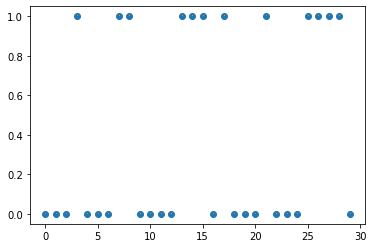

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(LSTM(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()

## Bidirectional + GRU

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              100608    
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
 dense_9 (Dense)             (None, 2)                 22        
                                                                 
Total params: 103,200
Trainable params: 103,200
Non-trainable params: 0
_________________________________________________________________


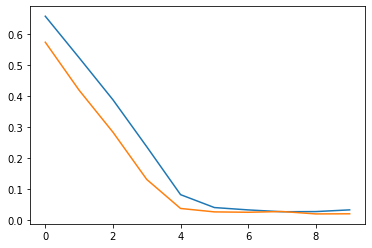

7/7 [==============================] - 0s 3ms/step - loss: 0.0438 - acc: 0.9750
loss= 0.043835509568452835
acc= 0.9750000238418579


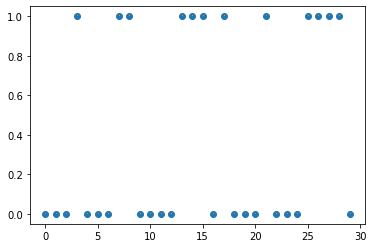

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(GRU(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()

## stacked 
- LSTM을 두개 쌓은 것 
- 이렇게 두개를 stack으로 쌓는 경우 return_sequence = Treu를 해주어야 함 
  - LSTM을 한개만 사용할 경우 output이 1개만 나가는데 stack으로 사용할 경우 다음 LSTM을 위해 각각의 bias를 보내줘야 하기 때문에 return_sequence = True를 사용 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 flatten_5 (Flatten)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 199,456
Trainable params: 199,456
Non-trainable params: 0
_________________________________________________________________


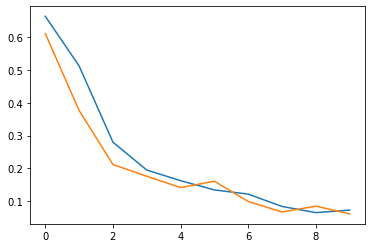

7/7 [==============================] - 0s 4ms/step - loss: 0.1163 - acc: 0.9350
loss= 0.11634407937526703
acc= 0.9350000023841858


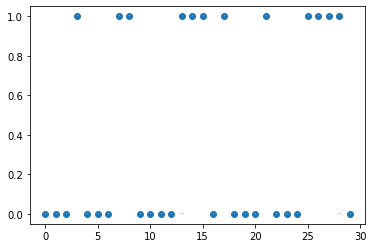

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128, return_sequences=True)) #<----- LSTM 레이어를 stack하기 위해 각 노드의 bias를 다중으로 보내주어야 함 return_sequence=True가 그 역할 
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()

## CNN

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                  

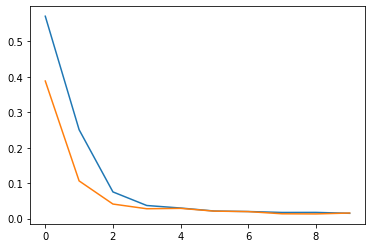

7/7 [==============================] - 0s 4ms/step - loss: 0.0184 - acc: 1.0000
loss= 0.01840193197131157
acc= 1.0


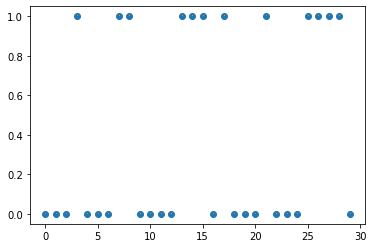

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()

## CNN + LSTM

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 32)             128       
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 lstm_4 (LSTM)               (None, 128)               82432     
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
 dense_15 (Dense)            (None, 2)                 22        
                                                                 
Total params: 86,976
Trainable params: 86,976
Non-trai

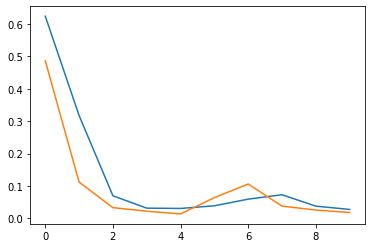

7/7 [==============================] - 0s 4ms/step - loss: 0.0284 - acc: 0.9950
loss= 0.028431681916117668
acc= 0.9950000047683716


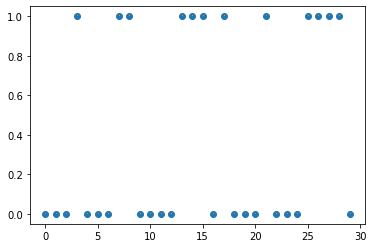

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()